In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Read csv file using pandas
df = pd.read_csv('diabetes_data.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Show first top 5 rows
df.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


In [3]:
# Check the information and is there any Nan values in Dataframe
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1000 non-null   int64         
 1   date                  1000 non-null   datetime64[ns]
 2   weight                1000 non-null   float64       
 3   height                1000 non-null   float64       
 4   blood_glucose         1000 non-null   float64       
 5   physical_activity     1000 non-null   float64       
 6   diet                  1000 non-null   int64         
 7   medication_adherence  1000 non-null   int64         
 8   stress_level          1000 non-null   int64         
 9   sleep_hours           1000 non-null   float64       
 10  hydration_level       1000 non-null   int64         
 11  bmi                   1000 non-null   float64       
 12  risk_score            1000 non-null   float64       
dtypes: datetime64[ns](1

0

In [4]:
# Descriptive statsitics using describe function.
stats = df.drop(columns = ['user_id', 'date']).describe().transpose() 

# Additional statistics skewness and kurtosis.
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['kurtosis'] = df.select_dtypes(include=[np.number]).apply(kurtosis)

# Print statistics table.
stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
weight,1000.0,70.361797,14.467165,40.0,60.286145,70.379509,79.719158,120.000000,0.184499,-0.187869
height,1000.0,170.795375,9.742934,150.0,163.937583,170.630771,177.288822,200.000000,0.082930,-0.271574
blood_glucose,1000.0,140.818899,38.064177,70.0,114.080015,139.989969,166.436613,297.049508,0.250028,-0.102917
physical_activity,1000.0,30.294497,19.305165,0.0,15.251591,30.003691,43.338908,94.861859,0.275066,-0.512068
diet,1000.0,0.604000,0.489309,0.0,0.000000,1.000000,1.000000,1.000000,-0.425941,-1.819118
medication_adherence,1000.0,0.693000,0.461480,0.0,0.000000,1.000000,1.000000,1.000000,-0.838115,-1.299670
stress_level,1000.0,0.950000,0.833183,0.0,0.000000,1.000000,2.000000,2.000000,0.093903,-1.551965
sleep_hours,1000.0,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.000000,0.236165,-0.572510
hydration_level,1000.0,0.710000,0.453989,0.0,0.000000,1.000000,1.000000,1.000000,-0.926986,-1.143273
bmi,1000.0,24.385500,5.872022,10.9,20.100000,24.100000,28.225000,45.200000,0.392424,0.013356


In [5]:
# Correlation method gives relationship between columns.
df.drop(columns = ['user_id','date']).corr()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
weight,1.000000,-0.046083,0.025479,-0.011217,-0.028077,0.052937,-0.025386,0.040990,0.033954,0.873303,0.327892
height,-0.046083,1.000000,-0.009759,-0.054711,0.044193,-0.016219,0.032180,0.039334,-0.011968,-0.514455,-0.212102
blood_glucose,0.025479,-0.009759,1.000000,0.026834,-0.006733,0.016017,-0.005974,-0.043918,0.042402,0.023191,0.080617
physical_activity,-0.011217,-0.054711,0.026834,1.000000,-0.004404,0.072692,-0.006548,-0.012727,0.013529,0.017650,-0.386443
diet,-0.028077,0.044193,-0.006733,-0.004404,1.000000,0.015196,-0.011786,-0.040246,0.063807,-0.049207,-0.354319
medication_adherence,0.052937,-0.016219,0.016017,0.072692,0.015196,1.000000,-0.013928,-0.019149,-0.014477,0.049665,-0.488671
stress_level,-0.025386,0.032180,-0.005974,-0.006548,-0.011786,-0.013928,1.000000,-0.002906,-0.011909,-0.041764,0.262635
sleep_hours,0.040990,0.039334,-0.043918,-0.012727,-0.040246,-0.019149,-0.002906,1.000000,-0.053486,0.014240,-0.023773
hydration_level,0.033954,-0.011968,0.042402,0.013529,0.063807,-0.014477,-0.011909,-0.053486,1.000000,0.032516,-0.160337
bmi,0.873303,-0.514455,0.023191,0.017650,-0.049207,0.049665,-0.041764,0.014240,0.032516,1.000000,0.399816


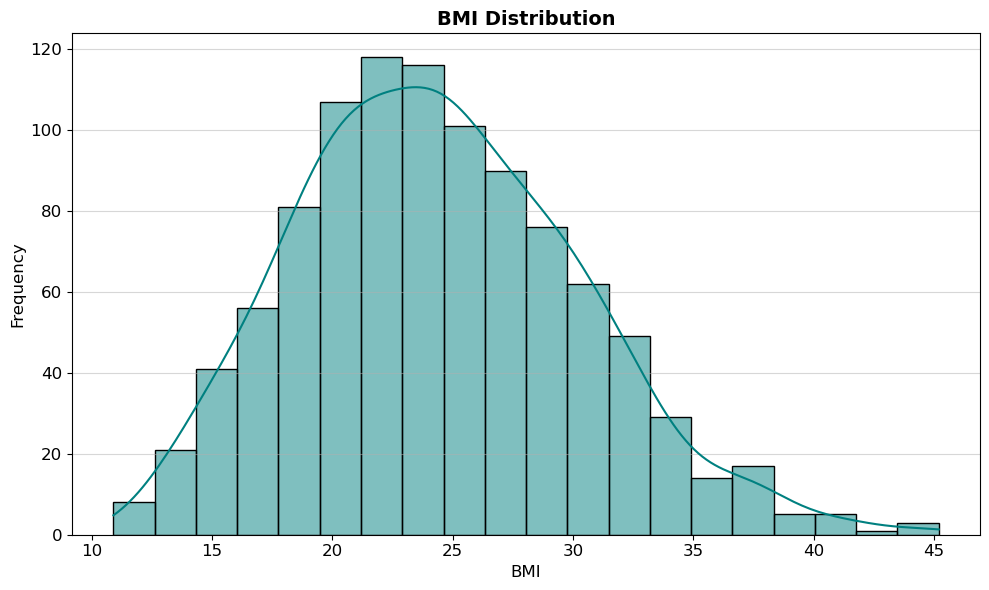

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for BMI distribution 
def plot_bmi_distribution():
    """
    Creates a histogram of the BMI distribution with a kernel density estimate (KDE) overlay.
    
    This function visualizes the distribution of the 'bmi' column from the dataset. 
    The plot includes a histogram with bins, a KDE for smoothing, and grid lines for better visualization. 
    It provides a clear view of the frequency of different BMI values in the dataset.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df["bmi"], kde=True, bins=20, color="teal", edgecolor='black', zorder=1)
    plt.title("BMI Distribution", fontsize=14, fontweight='bold')
    plt.xlabel("BMI", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', alpha=0.5, zorder=3)
    plt.tight_layout()
    plt.savefig('BMI Distribution.png', bbox_inches = 'tight')
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_bmi_distribution()

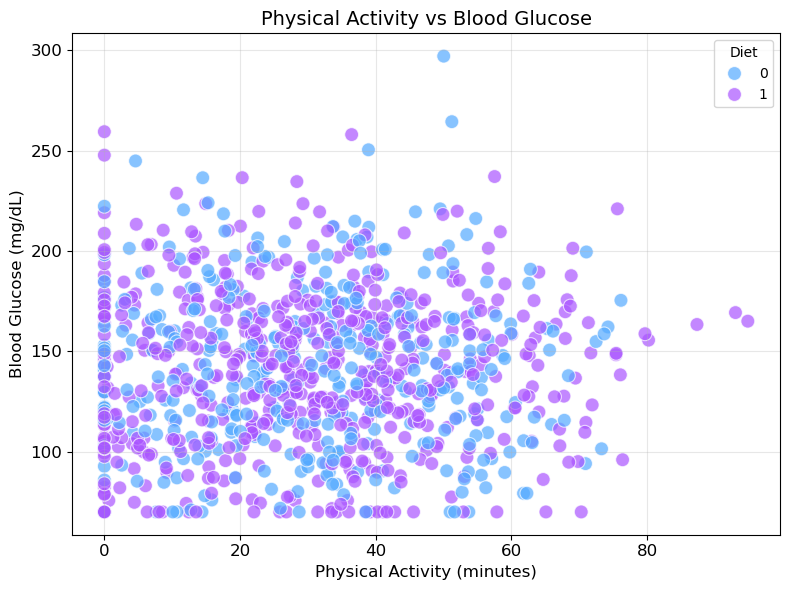

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for scatter plot
def plot_scatter():
    """
    Creates a scatter plot of Physical Activity vs Blood Glucose .
    
    This function visualizes the relationship between physical activity and blood glucose levels
    across different diets. The plot includes a scatter plot of data points with a color legend to
    differentiate diets.
    
    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="physical_activity", y="blood_glucose", hue="diet", palette="cool",s=100, alpha=0.7, legend='full')
    plt.title("Physical Activity vs Blood Glucose", fontsize=14)
    plt.xlabel("Physical Activity (minutes)", fontsize=12)
    plt.ylabel("Blood Glucose (mg/dL)", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.3, zorder=3)
    plt.legend(title='Diet')
    plt.tight_layout()
    plt.savefig('Scatter.png', bbox_inches='tight')
    plt.show()
    
# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_scatter()


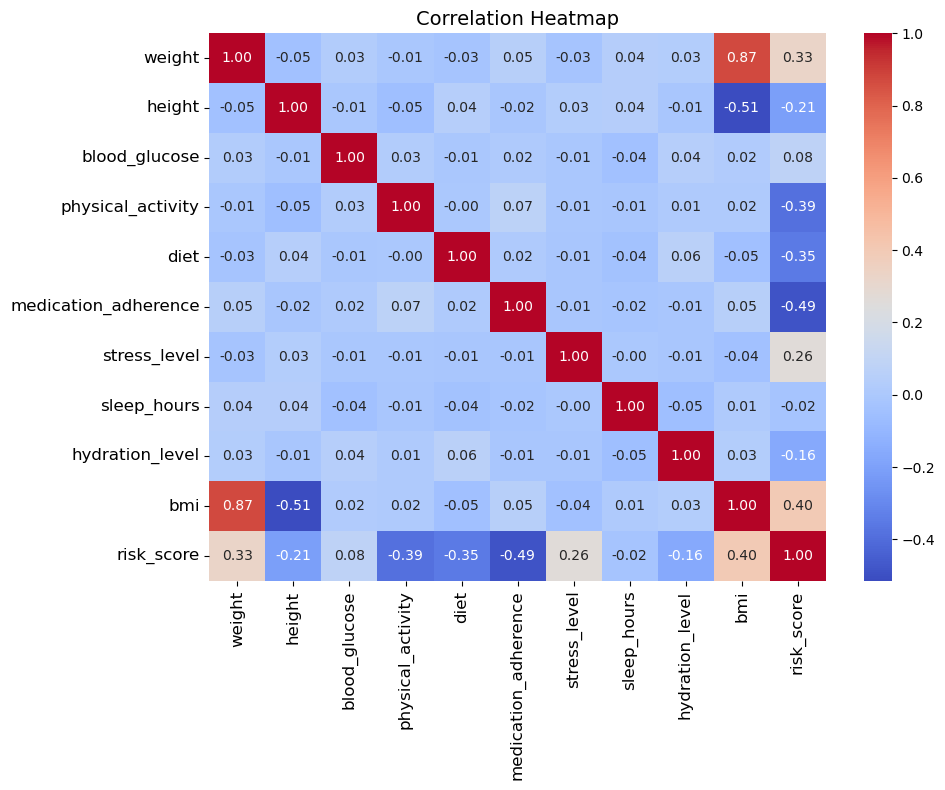

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for Heatmap
def plot_heatmap():
    """
    Creates a heatmap to visualize the correlation matrix of the dataset.
    
    This function calculates the correlation matrix for all numeric columns in the dataset,
    excluding 'user_id' and 'date'. It then plots the heatmap using Seaborn to display
    correlations between variables with a color scale. The heatmap includes annotations for
    each cell to show the correlation value.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(10, 8))
    correlation = df.drop(columns=["user_id", "date"]).corr()  # Compute correlation matrix
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm") # Plot heatmap with annotations and color scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_heatmap()


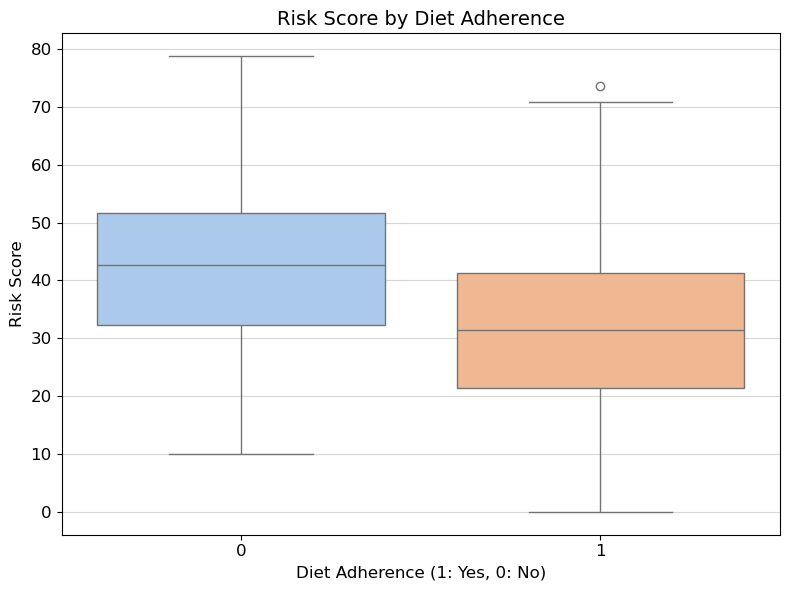

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Box Plot function
def plot_boxplot():
    """
    Creates a boxplot to compare the distribution of risk scores across different diet adherence levels.
    
    This function uses a boxplot to visualize how the risk score varies between different levels of diet adherence.
    It provides a clear visual distinction between diet adherence (1 for 'Yes', 0 for 'No') and the corresponding
    distribution of risk scores. The plot helps in understanding the impact of diet adherence on risk scores.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="diet", y="risk_score", palette="pastel", legend=True)
    plt.title("Risk Score by Diet Adherence", fontsize=14)
    plt.xlabel("Diet Adherence (1: Yes, 0: No)", fontsize=12)
    plt.ylabel("Risk Score", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function to create the plot
plot_boxplot()


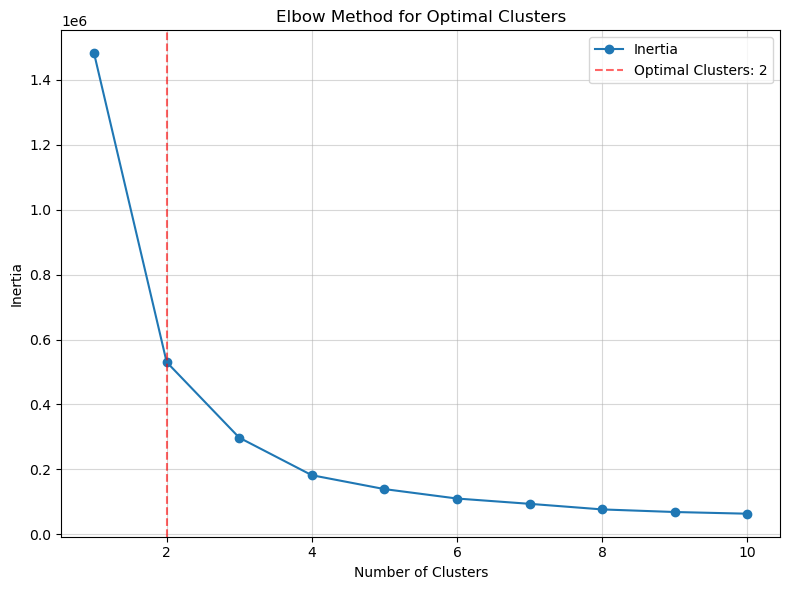

In [10]:
from sklearn.cluster import KMeans

#  Create Elbow Plot function for K-Means Clustering
def plot_elbow_method():
    """
    Plot the Elbow Method for determining the optimal number of clusters.
    Includes a vertical line for the optimal cluster count and updates the legend.
    """
    # Prepare the data
    X = df[["bmi", "blood_glucose"]].dropna()
    
    # Calculate inertia for 1 to 10 clusters
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # Determine the optimal number of clusters using the "elbow" method
    optimal_clusters = 2 
    
    # Plot the Elbow Method
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o',label='Inertia')
    plt.axvline(optimal_clusters, color='red', linestyle='--', alpha=0.6, label=f'Optimal Clusters: {optimal_clusters}')
    plt.title("Elbow Method for Optimal Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.legend(loc='best')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv')

# Call the function
plot_elbow_method()


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create a Clustering Function which will not give a plot
def perform_clustering(data, features, max_clusters=10, elbow_threshold=0.1):
    """
    Perform K-means clustering on a dataset with normalization and back-scaling.

    Parameters:
    - data (pandas.DataFrame): The input dataset.
    - features (list): List of feature column names to use for clustering.
    - max_clusters (int): Maximum number of clusters to evaluate for the elbow method.
    - elbow_threshold (float): Threshold for selecting the optimal cluster count.

    Returns:
    - clustered_data (pandas.DataFrame): Input data with cluster labels added.
    - cluster_centers (numpy.ndarray): Back-scaled cluster centers in original feature space.
    - optimal_clusters (int): The optimal number of clusters based on the elbow method.
    """
    # Select relevant features for clustering
    X = data[features].dropna()
    
    # Standardize the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)
    
    # Use the elbow method to find the optimal number of clusters
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertia.append(kmeans.inertia_)
    
    # Calculate the rate of decrease in inertia
    rates = np.diff(inertia) / np.max(np.diff(inertia))
    optimal_clusters = np.argmax(rates < -elbow_threshold) + 2
    
    # Fit KMeans with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(scaled_features)
    
    # Add cluster labels to the original dataset
    data['cluster'] = kmeans.labels_
    
    # Back-scale the cluster centers
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return data, cluster_centers, optimal_clusters

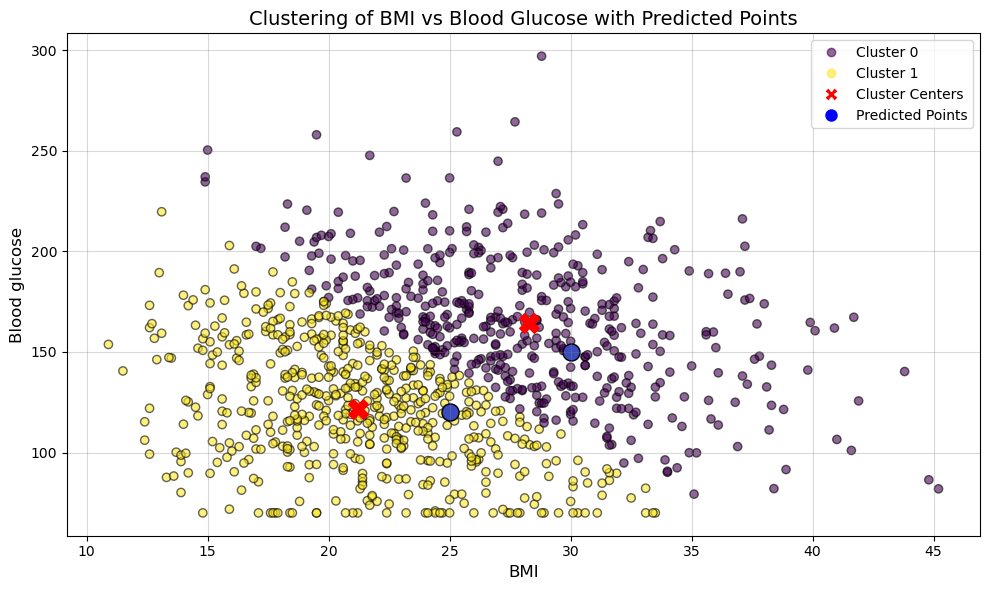

In [12]:
# Create a function for the clusters centers and predictions
def plot_clusters_with_predictions(data, features, predictions, cluster_centers, optimal_clusters):
    """
    Visualize clusters with their centers and include predicted points.
    
    Parameters:
    - data (pandas.DataFrame): The input dataset with cluster labels.
    - features (list): The list of feature column names used for clustering.
    - predictions (numpy.ndarray): Array of new points to predict and plot.
    - cluster_centers (numpy.ndarray): Coordinates of cluster centers.
    - optimal_clusters (int): Number of clusters.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot existing clusters
    scatter = plt.scatter(data[features[0]], data[features[1]], 
                          c=data['cluster'], cmap='viridis', alpha=0.6, edgecolor='k')
    
    # Plot the cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    
    # Assign predictions to clusters
    scaler = StandardScaler()
    X = data[features].dropna()
    scaled_X = scaler.fit_transform(X)
    scaled_predictions = scaler.transform(predictions)
    
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    kmeans.fit(scaled_X)
    predicted_labels = kmeans.predict(scaled_predictions)
    
    # Plot predicted points
    for idx, point in enumerate(predictions):
        plt.scatter(point[0], point[1], 
                    c=[predicted_labels[idx]], cmap='coolwarm', 
                    s=150, edgecolor='black', marker='o', label=f'Predicted Point {idx + 1}')
    
    # Add a descriptive title
    plt.title(f"Clustering of {features[0].upper()} vs {features[1].replace('_', ' ').title()} with Predicted Points", fontsize=14)
    
    # Add labels for axes
    plt.xlabel(features[0].upper(), fontsize=12)
    plt.ylabel(features[1].replace('_', ' ').capitalize(), fontsize=12)
    
    # Add legend
    legend_handles, _ = scatter.legend_elements()
    cluster_names = [f'Cluster {i}' for i in range(optimal_clusters)]
    legend_handles += [
        plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='red', markersize=10, label='Cluster Centers'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Predicted Points')
    ]
    cluster_names += ['Cluster Centers', 'Predicted Points']
    plt.legend(legend_handles, cluster_names, loc='upper right')
    
    # Add grid and save the plot
    plt.grid(color='gray', alpha=0.3, zorder=1)
    plt.tight_layout()
    plt.show()



# Define features for clustering
features = ["bmi", "blood_glucose"]

# Define new points to predict and assign to clusters
new_points = np.array([
    [25, 120],  # predicted point 1
    [30, 150],  # predicted point 2
])

# Perform clustering
clustered_data, cluster_centers, optimal_clusters = perform_clustering(df, features)

# Plot clusters with predicted points
plot_clusters_with_predictions(clustered_data, features, new_points, cluster_centers, optimal_clusters)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm

# Create a function for fitting but it will not give a plot, only returns the values
def perform_fitting(data, x_feature, y_feature, prediction_points=None, confidence=0.95):
    """
    Perform linear regression fitting and provide predictions with associated uncertainties.

    Parameters:
    - data (DataFrame): The dataset containing the features for fitting.
    - x_feature (str): The feature name to use as the independent variable (X).
    - y_feature (str): The feature name to use as the dependent variable (Y).
    - prediction_points (array-like): Optional. X values for which predictions are to be made.
    - confidence (float): Confidence level for the interval (default: 0.95).

    Returns:
    - dict: A dictionary containing:
        - 'model': The trained LinearRegression model.
        - 'coef': Coefficient (slope) of the linear regression model.
        - 'intercept': Intercept of the linear regression model.
        - 'predictions': Predicted Y values for the provided prediction points.
        - 'confidence_intervals': Confidence intervals for the predictions.
        - 'errors': Standard errors for the predictions.
    """
    # Prepare data
    X = data[x_feature].values.reshape(-1, 1)
    y = data[y_feature].values

    # Train-test split (to ensure generalization if needed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and confidence intervals
    if prediction_points is None:
        prediction_points = np.linspace(X.min(), X.max(), 800).reshape(-1, 1)
    else:
        prediction_points = np.array(prediction_points).reshape(-1, 1)

    predictions = model.predict(prediction_points)
    # Correctly calculate residual standard error
    residual_std_error = np.sqrt(np.mean((y_train - model.predict(X_train)) ** 2))  # Residual standard error

    # Confidence intervals
    ci_range = norm.ppf(1 - (1 - confidence) / 2)  # Z-score for desired confidence
    errors = ci_range * residual_std_error  # Standard error for the prediction
    lower_bounds = predictions - errors
    upper_bounds = predictions + errors

    return {
        'model': model,
        'coef': model.coef_,
        'intercept': model.intercept_,
        'predictions': predictions,
        'confidence_intervals': (lower_bounds, upper_bounds),
        'errors': errors
    }



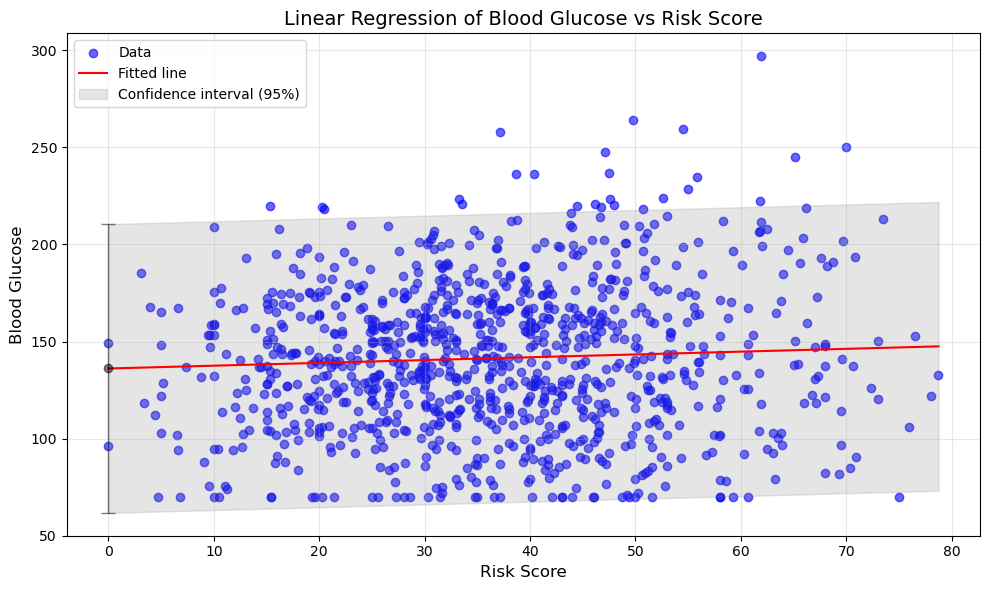

In [14]:
# Create a fitting function for visualization
def plot_fitting_results(fitting_results, data, x_feature, y_feature):
    """
    Plot the fitting results including the original data, fitted line, and confidence intervals.

    Parameters:
    - fitting_results (dict): Dictionary containing the fitting results returned by `perform_fitting`.
    - data (DataFrame): The original dataset used for fitting.
    - x_feature (str): The feature name used as the independent variable.
    - y_feature (str): The feature name used as the dependent variable.
    """
    model = fitting_results['model']
    predictions = fitting_results['predictions']
    lower_bounds, upper_bounds = fitting_results['confidence_intervals']
    errors = fitting_results['errors']

    # Sort data for smooth plot
    x_sorted = np.linspace(data[x_feature].min(), data[x_feature].max(), 800).reshape(-1, 1)
    y_sorted = model.predict(x_sorted)
    
    # Plot original data
    plt.figure(figsize=(10, 6))
    plt.grid(alpha=0.5)
    plt.scatter(data[x_feature], data[y_feature], label='Data', color='blue', alpha=0.6)
   
    # Plot fitted line
    plt.plot(x_sorted, y_sorted, color='red', label='Fitted line')

    # Add confidence intervals
    plt.fill_between(x_sorted.flatten(), lower_bounds.flatten(), upper_bounds.flatten(), 
                     color='gray', alpha=0.2, label='Confidence interval (95%)')

    # Plot error bars
    for x, y, error in zip(x_sorted.flatten(), y_sorted.flatten(), errors.flatten()):
        plt.errorbar(x, y, yerr=error, fmt='o', color='black', alpha=0.5, capsize=5, elinewidth=1, ecolor='black')

    plt.title(f"Linear Regression of {y_feature.replace('_', ' ').title()} vs {x_feature.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(x_feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(y_feature.replace('_', ' ').title(), fontsize=12)

    # Grid and legend
    plt.grid(alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('Fitting.png', bbox_inches='tight')
    plt.show()

# Load the dataset
df = pd.read_csv('diabetes_data.csv') 

# Use the perform_fitting function 
fitting_results = perform_fitting(df, x_feature="risk_score", y_feature="blood_glucose")

# Call the function to show the plot
plot_fitting_results(fitting_results, df, x_feature="risk_score", y_feature="blood_glucose")
